# First Program

## Step1- Import Libraries
Let's import some libraries to get started!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Step2- Create the Data

#### We will use the same data for the train and for the test

In [ ]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print(x)
print(y)

In [ ]:
plt.scatter(x,y,c=y)

## Step 3- Build a Logistic Regression model for classification

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Step 4- Train the model

In [ ]:
model.fit(x, y)

In [ ]:
# Retrouver les coefficients et l'ordonnée à l'origine
print(model.coef_)
print(model.intercept_)

In [ ]:
ordonne = np.linspace(0,10,1000)
plt.scatter(x,y,c=y)
plt.plot(ordonne,1/(1+np.exp(-model.coef_[0][0]*ordonne-model.intercept_[0])),color='r')

## Step 5- Evaluation

In [ ]:
y_predict = model.predict(x)
print(y_predict)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y, y_predict)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y, y_predict).ravel() #for flattened output
print(tn,fp,fn,tp)

In [ ]:
print(classification_report(y, model.predict(x)))

## Step 6- ROC Curve
#### Première méthode

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x, y)
plt.show()

## Step 6- ROC Curve
#### Deuxième méthode

In [ ]:
model.predict_proba(x)

In [ ]:
y_test_predict_probs = model.predict_proba(x)[:,1] #Gives the prob for each target class
# we just need the prob for the class 1
print(y_test_predict_probs)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score 
fpr, tpr, thresholds = roc_curve(y, y_test_predict_probs) 
print(fpr,tpr,thresholds)
plt.plot(fpr, tpr)

In [ ]:
test_auc_roc = roc_auc_score(y, y_test_predict_probs)
print('Testing AUC: ', test_auc_roc)

In [ ]:
from numpy import argmax
best = tpr - fpr
print(best)
ix = argmax(best)
best_threshold = thresholds[ix]
print('Best Threshold = ', best_threshold)

# RocCurveDisplay

## Step1- Import Libraries
Let's import some libraries to get started!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Step2- Create the Data

#### We will use the same data for the train and for the test

In [2]:
X_train = np.arange(10).reshape(-1, 1)
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

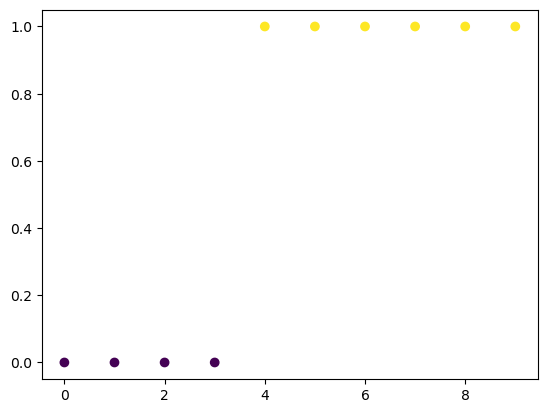

In [3]:
plt.scatter(X_train,y_train,c=y_train)

## Step 3- Build a Logistic Regression model for classification

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Step 4- Train the model

In [5]:
model.fit(X_train, y_train)

LogisticRegression()

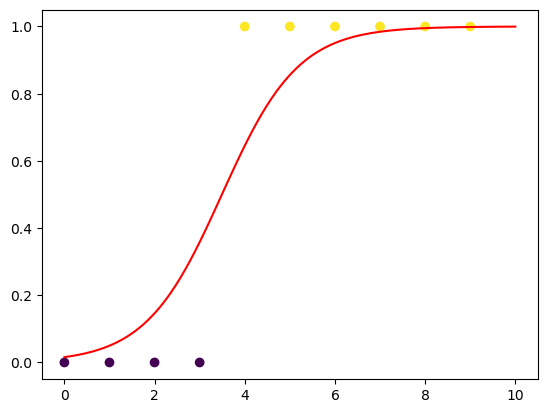

In [6]:
abscisse = np.linspace(0,10,1000)
plt.scatter(X_train,y_train,c=y_train)
plt.plot(abscisse,1/(1+np.exp(-model.coef_[0][0]*abscisse-model.intercept_[0])),color='r')

## Step 5- Evaluation

In [7]:
X_test = np.arange(10).reshape(-1, 1)
y_test = np.array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

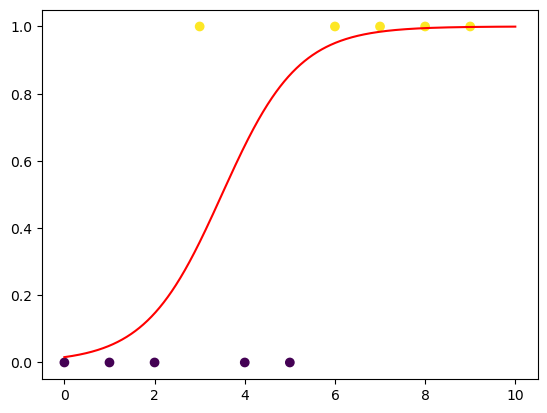

In [8]:
abscisse = np.linspace(0,10,1000)
plt.scatter(X_test,y_test,c=y_test)
plt.plot(abscisse,1/(1+np.exp(-model.coef_[0][0]*abscisse-model.intercept_[0])),color='r')

In [9]:
y_predict = model.predict(X_test)
print(y_predict)

[0 0 0 0 1 1 1 1 1 1]


## Step 6- ROC Curve

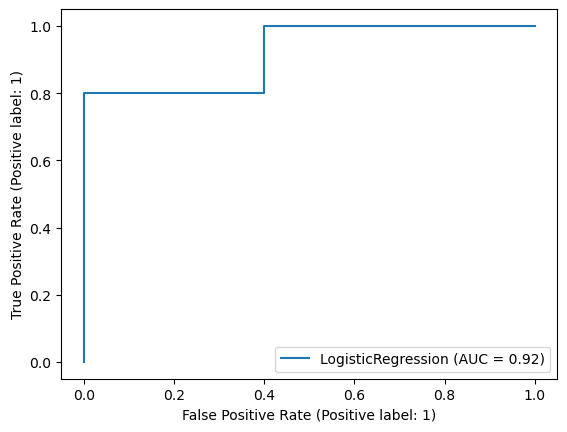

In [10]:
#first method
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [11]:
#second method
from sklearn import metrics
logreg_y_decision = model.decision_function(X_test)
print(logreg_y_decision)

[-4.12617727 -2.94508636 -1.76399544 -0.58290453  0.59818638  1.77927729
  2.96036821  4.14145912  5.32255003  6.50364095]


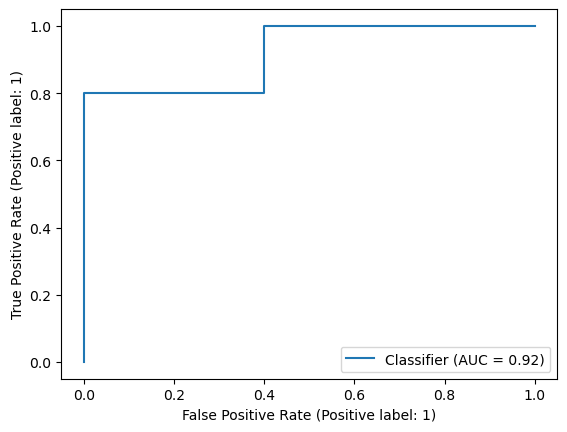

In [12]:
metrics.RocCurveDisplay.from_predictions(y_test,logreg_y_decision)